<a href="https://colab.research.google.com/github/amfaller/MassTrack-MBTA/blob/main/MassTrack_MBTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MassTrack: MBTA
This Colab notebook serves as a scratch pad to analyze MBTA data for the Green Line portion of the MassTrack system.

## Fetch Data

The data is located in a Zenodo repository located here: https://zenodo.org/records/15121997

This is the same zip file available directly from the MBTA data repository: https://mbta-massdot.opendata.arcgis.com/datasets/0b4dc16b8b984836962229865d5b573b/about

In [1]:
!wget -O TravelTimes_2024.zip "https://zenodo.org/record/15121997/files/TravelTimes_2024.zip?download=1"

--2025-04-09 19:25:22--  https://zenodo.org/record/15121997/files/TravelTimes_2024.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/15121997/files/TravelTimes_2024.zip [following]
--2025-04-09 19:25:22--  https://zenodo.org/records/15121997/files/TravelTimes_2024.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1347504983 (1.3G) [application/octet-stream]
Saving to: ‘TravelTimes_2024.zip’

TravelTimes_2024.zi 100%[===================>]   1.25G  30.7MB/s    in 43s     

2025-04-09 19:26:05 (29.9 MB/s) - ‘TravelTimes_2024.zip’ saved [1347504983/1347504983]



In [2]:
import zipfile
import fnmatch

# Define your pattern
pattern = "TravelTimes_2024/2024-*_LRTravelTimes.csv"

# Open the zip file
with zipfile.ZipFile("TravelTimes_2024.zip", "r") as zip_ref:
    # List all files in the archive
    all_files = zip_ref.namelist()

    # Filter files that match the pattern
    matching_files = [f for f in all_files if fnmatch.fnmatch(f, pattern)]

    # Extract only the matching files
    for file in matching_files:
        zip_ref.extract(file, "TravelTimes_2024")

## Preprocess / Import the Datasets

The CSV files to analyze are all located in a directory `"TravelTimes_2024/TravelTimes_2024/2024-XY_LRTravelTimes.csv"` where `XY` correspond to a month -- i.e. January is `2024-01_LRTravelTimes.csv`.

These files are large -- some are more than a gigabyte. However, it contains data for ALL trains, not just the Green line. Pre-process them via the filesystem.

In [3]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-01_LRTravelTimes.csv > 2024-01.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-01_LRTravelTimes.csv >> 2024-01.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-02_LRTravelTimes.csv > 2024-02.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-02_LRTravelTimes.csv >> 2024-02.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-03_LRTravelTimes.csv > 2024-03.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-03_LRTravelTimes.csv >> 2024-03.csv

In [4]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-04_LRTravelTimes.csv > 2024-04.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-04_LRTravelTimes.csv >> 2024-04.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-05_LRTravelTimes.csv > 2024-05.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-05_LRTravelTimes.csv >> 2024-05.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-06_LRTravelTimes.csv > 2024-06.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-06_LRTravelTimes.csv >> 2024-06.csv

In [5]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-07_LRTravelTimes.csv > 2024-07.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-07_LRTravelTimes.csv >> 2024-07.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-08_LRTravelTimes.csv > 2024-08.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-08_LRTravelTimes.csv >> 2024-08.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-09_LRTravelTimes.csv > 2024-09.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-09_LRTravelTimes.csv >> 2024-09.csv

In [6]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-10_LRTravelTimes.csv > 2024-10.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-10_LRTravelTimes.csv >> 2024-10.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-11_LRTravelTimes.csv > 2024-11.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-11_LRTravelTimes.csv >> 2024-11.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-12_LRTravelTimes.csv > 2024-12.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-12_LRTravelTimes.csv >> 2024-12.csv


In [7]:
!head -5 2024-01.csv

service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,to_stop_name,from_stop_departure_datetime,from_stop_departure_sec,to_stop_arrival_datetime,to_stop_arrival_sec,travel_time_sec
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-pktrm,70196,Park Street,2024-01-01T06:09:23Z,22163,2024-01-01T06:11:05Z,22265,102
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-boyls,70159,Boylston,2024-01-01T06:09:23Z,22163,2024-01-01T06:13:01Z,22381,218
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-armnl,70157,Arlington,2024-01-01T06:09:23Z,22163,2024-01-01T06:15:23Z,22523,360
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-coecl,70155,Copley,2024-01-01T06:09:23Z,22163,2024-01-01T06:18:14Z,22694,531


In [8]:
import pandas as pd

# Needed because Pandas keeps reporting that columns 6,9 have mixed datatypes.
# Also ensure that the datetime fields are interpreted as datetimes.
def loadData(file_name):
    df = pd.read_csv(
        file_name,
        parse_dates=["from_stop_departure_datetime", "to_stop_arrival_datetime"],
        low_memory=False
    )

    # Convert stop_id columns safely, replacing non-numeric values with NaN before conversion
    df["from_stop_id"] = pd.to_numeric(df["from_stop_id"], errors="coerce").fillna(0).astype(int)
    df["to_stop_id"] = pd.to_numeric(df["to_stop_id"], errors="coerce").fillna(0).astype(int)

    return df


# Helper functions to load each month
def loadJan():
    return loadData("2024-01.csv")

def loadFeb():
    return loadData("2024-02.csv")

def loadMar():
    return loadData("2024-03.csv")

def loadApr():
    return loadData("2024-04.csv")

def loadMay():
    return loadData("2024-05.csv")

def loadJun():
    return loadData("2024-06.csv")

def loadJul():
    return loadData("2024-07.csv")

def loadAug():
    return loadData("2024-08.csv")

def loadSep():
    return loadData("2024-09.csv")

def loadOct():
    return loadData("2024-10.csv")

def loadNov():
    return loadData("2024-11.csv")

def loadDec():
    return loadData("2024-12.csv")

# Store function references for easy iteration
dataLoadFunctions = [
    loadJan, loadFeb, loadMar, loadApr, loadMay, loadJun,
    loadJul, loadAug, loadSep, loadOct, loadNov, loadDec
]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

## RQ1: Does the combination of [*to_stop_arrival_datetime*, *to_stop_name*] constitute a pseudo-identifier?

Threat model:
* Adversary has/knows:
  * Start Station
  * Start Time
* Adversary hopes to:
  * Identify a single record in the data such that other fields may be determined
* Efficacy Metric:
  * Group records by (startStation, startTime) fields. Report percentage of single-record groups for each month in 2024.

In [9]:
def RQ1(df):
  rq1 = df.groupby(["to_stop_arrival_datetime", "to_stop_name",]).size().reset_index(name="count")

  uniqueRows = ((rq1["count"] == 1) | (rq1["count"] == 2)).sum()
  percentage = (uniqueRows / len(df)) * 100
  return percentage


In [10]:
percentages = []

for loadFn in dataLoadFunctions:
  df = loadFn()
  monthPercentUnique = RQ1(df)
  percentages.append(monthPercentUnique)
  del df

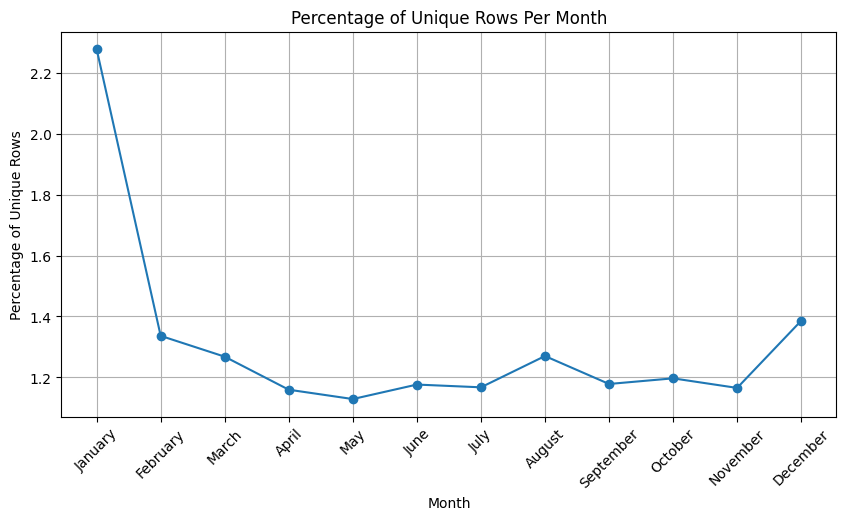

In [11]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(months, percentages, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Percentage of Unique Rows")
plt.title("Percentage of Unique Rows Per Month")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(True)
plt.show()

### Takeaways
The above plot reveals that the percentage of unique rides (given the starting station and time) is around 1-2% across much of 2024. This is a very low uniqueness percentage, which implies that this combination of fields does not strongly constitute a pseudo-identifier.

A speculation for this finding: it's possible that there is ambiguity due to the presence of multiple trains at the same station at the same time. This means that even if an attacker knows the start station and time, there is a low probability that the attacker will be able to re-identify that ride from this data.

## RQ2: Does the combination of [to_stop_arrival_datetime, to_stop_name, direction] constitute a pseudo-identifier?

Threat model:
* Adversary has/knows:
  * Start Station
  * Start Time
  * Direction (East/West)
* Adversary hopes to:
  * Identify a single record in the data such that other fields may be determined
* Efficacy Metric:
  * Group records by (startStation, startTime, direction) fields. Report percentage of single-record groups for each month in 2024.

In [12]:
def RQ2(df):
  rq2 = df.groupby(["to_stop_arrival_datetime", "to_stop_name", "direction"]).size().reset_index(name="count")

  uniqueRows = ((rq2["count"] == 1) | (rq2["count"] == 2)).sum()
  percentage = (uniqueRows / len(df)) * 100
  return percentage

In [13]:
percentages2 = []

for loadFn in dataLoadFunctions:
  df = loadFn()
  monthPercentUnique = RQ2(df)
  percentages2.append(monthPercentUnique)
  del df

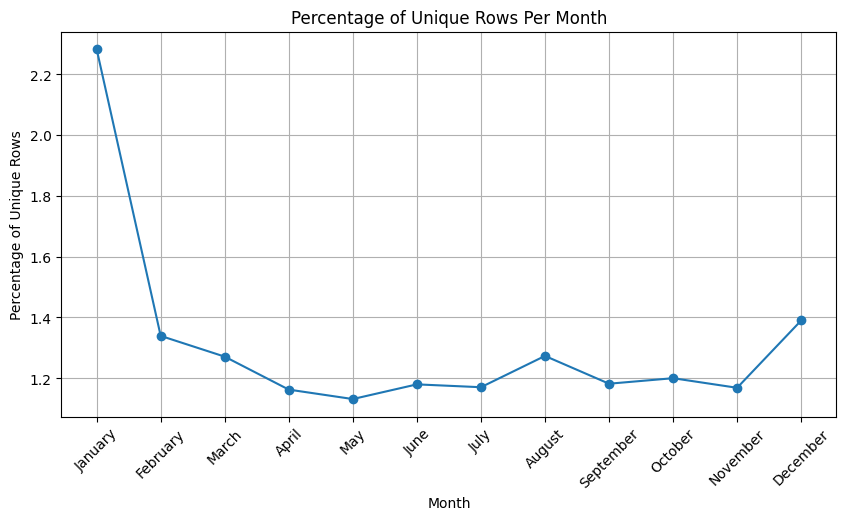

In [14]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(months, percentages2, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Percentage of Unique Rows")
plt.title("Percentage of Unique Rows Per Month")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(True)
plt.show()

### Takeaways

Including the direction field does not appear to significantly modify the uniqueness percentage. This suggests that direction is not a signficiant factor in the dataset, and if an adversary knew the combination of startStation, startTime, and direction, it would be difficult to identify the ride within the dataset.

In [15]:
percentages

[np.float64(2.278080954182906),
 np.float64(1.336157523725828),
 np.float64(1.267727604218794),
 np.float64(1.159246860265318),
 np.float64(1.1285760358963102),
 np.float64(1.1761628739648609),
 np.float64(1.1671163743032595),
 np.float64(1.26984735533831),
 np.float64(1.1780994321808709),
 np.float64(1.1965890348452763),
 np.float64(1.1651349030397964),
 np.float64(1.3857039676978393)]

In [16]:
percentages2

[np.float64(2.2829151291749183),
 np.float64(1.3394812052382723),
 np.float64(1.2711706358013513),
 np.float64(1.1627673060083519),
 np.float64(1.1317041772708154),
 np.float64(1.1799988477268006),
 np.float64(1.1706365069680813),
 np.float64(1.2735314581948673),
 np.float64(1.1821615511802932),
 np.float64(1.2002909966326172),
 np.float64(1.1687393989201518),
 np.float64(1.390083483624918)]